In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
np.random.seed(42)
data_size = 1000

In [4]:
data = pd.DataFrame({
    'Temperature (°C)': np.random.uniform(20, 35, data_size),
    'Humidity (%)': np.random.uniform(40, 80, data_size),
    'Light Intensity (lux)': np.random.uniform(10000, 50000, data_size),
    'CO2 Levels (ppm)': np.random.uniform(300, 800, data_size),
    'Water Supply (L/day)': np.random.uniform(0.5, 3, data_size),
    'Nutrient Concentration (%)': np.random.uniform(1, 5, data_size),
    'Soil Moisture (%)': np.random.uniform(20, 60, data_size)
})

In [5]:
targets = pd.DataFrame({
    'Optimal Temperature (°C)': data['Temperature (°C)'] + np.random.uniform(0, 2, data_size),
    'Optimal Humidity (%)': data['Humidity (%)'] + np.random.uniform(-5, 5, data_size),
    'Optimal Light Intensity (lux)': data['Light Intensity (lux)'] + np.random.uniform(-500, 500, data_size),
    'Optimal CO2 Levels (ppm)': data['CO2 Levels (ppm)'] + np.random.uniform(-20, 20, data_size),
    'Optimal Water Supply (L/day)': data['Water Supply (L/day)'] + np.random.uniform(-0.1, 0.1, data_size),
    'Optimal Nutrient Concentration (%)': data['Nutrient Concentration (%)'] + np.random.uniform(-0.5, 0.5, data_size),
    'Optimal Soil Moisture (%)': data['Soil Moisture (%)'] + np.random.uniform(-5, 5, data_size)
})

In [6]:
features = data[['Temperature (°C)', 'Humidity (%)', 'Light Intensity (lux)', 
                 'CO2 Levels (ppm)', 'Water Supply (L/day)', 
                 'Nutrient Concentration (%)', 'Soil Moisture (%)']]

In [7]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(targets)

In [8]:
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2]))),
    Dropout(0.2),
    BatchNormalization(),
    
    Bidirectional(LSTM(64, return_sequences=True, activation='relu')),
    Dropout(0.2),
    BatchNormalization(),
    
    Bidirectional(LSTM(32, activation='relu')),
    Dropout(0.2),
    
    Dense(7, activation='linear')
])

c:\Users\lenovo\OneDrive\Desktop\Major Project\Backend\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

In [12]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - loss: 0.2462 - mae: 0.4076 - val_loss: 0.2585 - val_mae: 0.4373
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1005 - mae: 0.2531 - val_loss: 0.2327 - val_mae: 0.4098
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0642 - mae: 0.2010 - val_loss: 0.2077 - val_mae: 0.3822
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0548 - mae: 0.1857 - val_loss: 0.1924 - val_mae: 0.3652
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0462 - mae: 0.1705 - val_loss: 0.1753 - val_mae: 0.3458
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0398 - mae: 0.1587 - val_loss: 0.1632 - val_mae: 0.3322
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0349 - mae: 0.1493 - val_loss: 0.1494 - val_mae: 0.3164
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0317 - mae: 0.1401 - val_loss: 0.1359 - val_mae: 0.3010
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - l

In [13]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mae: 0.0456 
Test Loss: 0.0033, Test MAE: 0.0457


In [14]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform to get real values
y_pred_real = scaler_y.inverse_transform(y_pred)

# Convert to DataFrame
y_pred_df = pd.DataFrame(y_pred_real, columns=targets.columns)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step


In [15]:
y_pred_df.head()

,Optimal Temperature (°C),Optimal Humidity (%),Optimal Light Intensity (lux),Optimal CO2 Levels (ppm),Optimal Water Supply (L/day),Optimal Nutrient Concentration (%),Optimal Soil Moisture (%)
0,26.898878,77.131119,17224.861328,530.623230,2.007269,3.149218,26.774733
1,33.032055,49.253609,30863.146484,654.554382,1.315317,2.117651,20.142681
2,28.149862,73.097778,24936.943359,730.021667,2.238568,4.332655,28.458677
3,26.084587,66.216621,27554.802734,538.184937,1.822940,1.715476,41.289089
4,35.783699,50.158134,18821.195312,428.149384,0.765466,2.923277,31.315748


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (32, 1, 256)           │       139,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 1, 256)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 1, 256)           │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (32, 1, 128)           │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 1, 128)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 1, 128)           │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (32, 64)               │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 7)                │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,038,935 (3.96 MB)

 Trainable params: 346,055 (1.32 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 692,112 (2.64 MB)

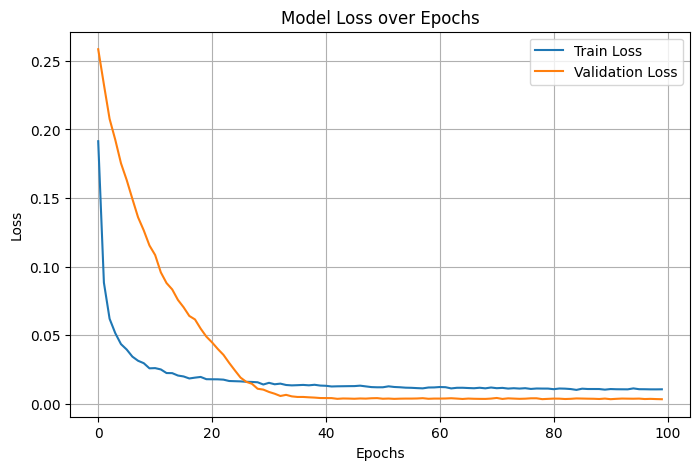

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


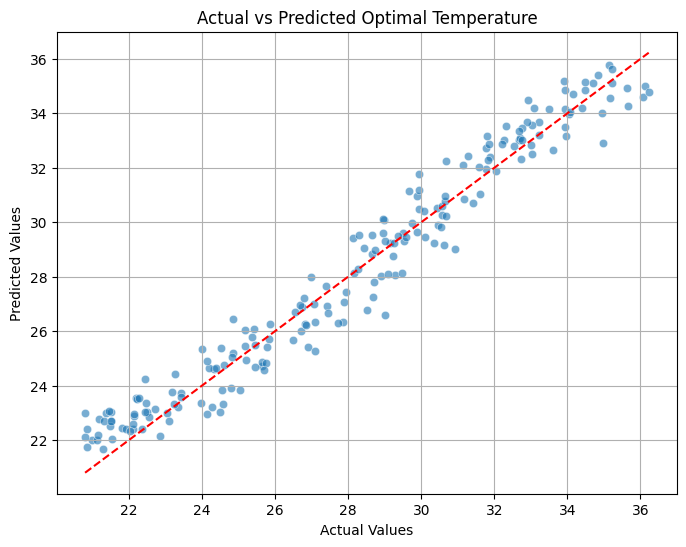

In [18]:
import seaborn as sns

# Convert actual and predicted values into a DataFrame for visualization
y_actual = scaler_y.inverse_transform(y_test)
y_pred_real = scaler_y.inverse_transform(y_pred)

df_results = pd.DataFrame({'Actual Temperature': y_actual[:, 0], 'Predicted Temperature': y_pred_real[:, 0]})

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual Temperature', y='Predicted Temperature', data=df_results, alpha=0.6)
plt.plot([df_results.min().min(), df_results.max().max()], [df_results.min().min(), df_results.max().max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Optimal Temperature')
plt.grid(True)
plt.show()

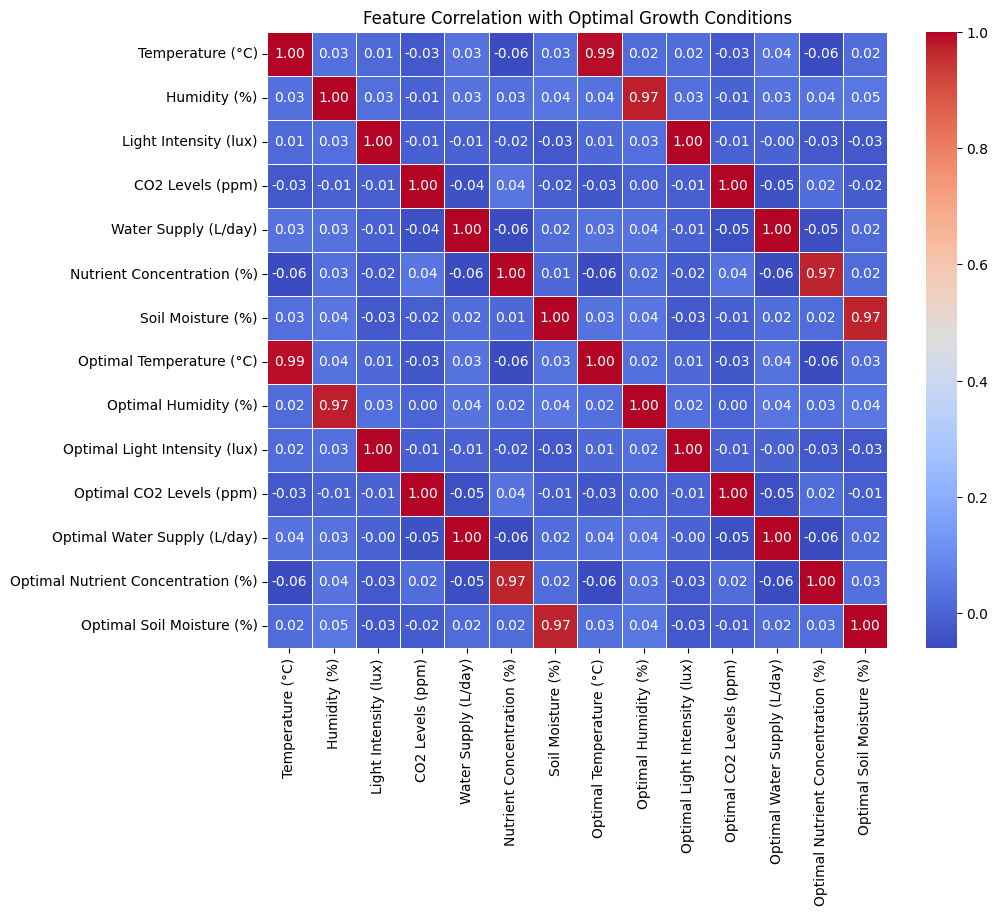

In [19]:
# Compute correlation between features and optimal conditions
correlation_matrix = pd.concat([features, targets], axis=1).corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Optimal Growth Conditions")
plt.show()


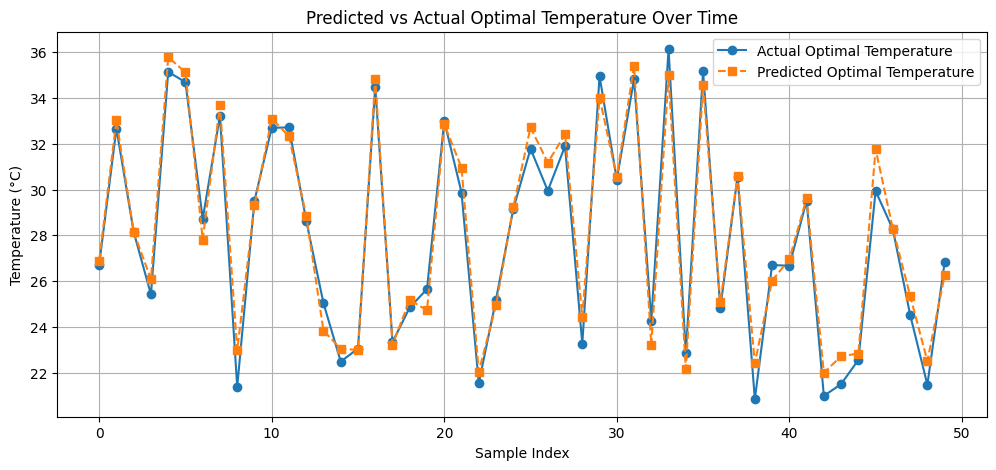

In [20]:
plt.figure(figsize=(12,5))

plt.plot(y_actual[:50, 0], label="Actual Optimal Temperature", marker="o", linestyle="-")
plt.plot(y_pred_real[:50, 0], label="Predicted Optimal Temperature", marker="s", linestyle="--")

plt.xlabel("Sample Index")
plt.ylabel("Temperature (°C)")
plt.title("Predicted vs Actual Optimal Temperature Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
model.save("rice_seedling_growth_model.keras")

In [22]:
import numpy as np
from tensorflow.keras.models import load_model

In [23]:
new_data = np.array([[30.5, 60, 10000, 400, 2.5, 5, 40]])

new_data_scaled = scaler_x.transform(new_data)

new_data_scaled = new_data_scaled.reshape(new_data_scaled.shape[0], 1, new_data_scaled.shape[1])

c:\Users\lenovo\OneDrive\Desktop\Major Project\Backend\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [24]:
predictions_scaled = model.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [25]:
predictions = scaler_y.inverse_transform(predictions_scaled)

print("Predicted Optimal Conditions:", predictions)

Predicted Optimal Conditions: [[3.2399010e+01 5.9429417e+01 1.0525353e+04 4.0005936e+02 2.6909099e+00
  4.7512555e+00 4.1516472e+01]]


In [26]:
predictions = scaler_y.inverse_transform(predictions_scaled)

pred_df = pd.DataFrame(predictions, columns=targets.columns)

In [28]:
pred_df

,Optimal Temperature (°C),Optimal Humidity (%),Optimal Light Intensity (lux),Optimal CO2 Levels (ppm),Optimal Water Supply (L/day),Optimal Nutrient Concentration (%),Optimal Soil Moisture (%)
0,32.39901,59.429417,10525.352539,400.059357,2.69091,4.751256,41.516472
